In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import pylab as pl
import numpy as np

# Unit 1: Properties of the Mean

### Properties of the Mean ###

In this course, we have used the words "average" and "mean" interchangeably, and will continue to do so. The definition of the mean will be familiar to you from your high school days or even earlier.

**Definition.** The *average* or *mean* of a collection of numbers is the sum of all the elements of the collection, divided by the number of elements in the collection.

The methods `np.average` and `np.mean` return the mean of an array. 

In [2]:
not_symmetric = make_array(2, 3, 3, 9)

In [3]:
np.average(not_symmetric)

4.25

In [4]:
np.mean(not_symmetric)

4.25

### Basic Properties ###

The definition and the example above point to some properties of the mean.

- It need not be an element of the collection.
- It need not be an integer even if all the elements of the collection are integers.
- It is somewhere between the smallest and largest values in the collection.
- It need not be halfway between the two extremes; it is not in general true that half the elements in a collection are above the mean.
- If the collection consists of values of a variable measured in specified units, then the mean has the same units too.

We will now study some other properties that are helpful in understanding the mean and its relation to other statistics.

### The Mean is a "Smoother" ##

You can think of taking the mean as an "equalizing" or "smoothing" operation. For example, imagine the entries in `not_symmetric` above as the dollars in the pockets of four different people. To get the mean, you first put all of the money into one big pot and then divide it evenly among the four people. They had started out with different amounts of money in their pockets (\$2, \$3, \$3, and \$9), but now each person has \$4.25, the mean amount.

### Proportions are Means ###
If a collection consists only of ones and zeroes, then the sum of the collection is the number of ones in it, and the mean of the collection is the proportion of ones.

In [5]:
zero_one = make_array(1, 1, 1, 0)
sum(zero_one)

3

In [6]:
np.mean(zero_one)

0.75

You can replace 1 by the Boolean `True` and 0 by `False`:

In [7]:
np.mean(make_array(True, True, True, False))

0.75

Because proportions are a special case of means, results about random sample means apply to random sample proportions as well.

### The Mean and the Histogram ###
The mean of the collection {2, 3, 3, 9} is 4.25, which is not the "halfway point" of the data. So then what does the mean measure?

To see this, notice that the mean can be calculated in different ways.

$$\begin{align*}
\mbox{mean} ~ &=~ 4.25 \\ \\
&=~ \frac{2 + 3 + 3 + 9}{4} \\ \\
&=~ 2 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{1}{4} ~~ + ~~ 9 \cdot \frac{1}{4} \\ \\
&=~ 2 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{2}{4} ~~ + ~~ 9 \cdot \frac{1}{4} \\ \\
&=~ 2 \cdot 0.25 ~~ + ~~ 3 \cdot 0.5 ~~ + ~~ 9 \cdot 0.25
\end{align*}$$

The last expression is an example of a general fact: when we calculate the mean, each distinct value in the collection is *weighted* by the proportion of times it appears in the collection.

This has an important consequence. The mean of a collection depends only on the distinct values and their proportions, not on the number of elements in the collection. In other words, the mean of a collection depends only on the distribution of values in the collection.

Therefore, **if two collections have the same distribution, then they have the same mean.**

For example, here is another collection that has the same distribution as `not_symmetric` and hence the same mean.

In [8]:
not_symmetric

array([2, 3, 3, 9])

In [9]:
same_distribution = make_array(2, 2, 3, 3, 3, 3, 9, 9)
np.mean(same_distribution)

4.25

The mean is a physical attribute of the histogram of the distribution. Here is the histogram of the distribution of `not_symmetric` or equivalently the distribution of `same_distribution`.

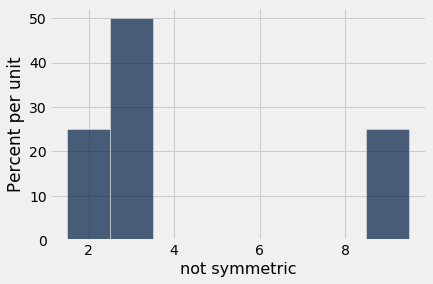

In [10]:
t1 = Table().with_columns('not symmetric', not_symmetric)
t1.hist(bins=np.arange(1.5, 9.6, 1))

Imagine the histogram as a figure made out of cardboard attached to a wire that runs along the horizontal axis, and imagine the bars as weights attached at the values 2, 3, and 9. Suppose you try to balance this figure on a point on the wire. If the point is near 2, the figure will tip over to the right. If the point is near 9, the figure will tip over to the left. Somewhere in between is the point where the figure will balance; that point is the 4.25, the mean.

**The mean is the center of gravity or balance point of the histogram.**

To understand why that is, it helps to know some physics. The center of gravity is calculated exactly as we calculated the mean, by using the distinct values weighted by their proportions.

Because the mean is a balance point, it is sometimes displayed as a *fulcrum* or triangle at the base of the histogram.

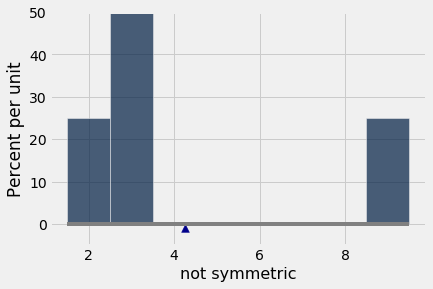

In [11]:
mean_ns = np.mean(not_symmetric)
t1.hist(bins=np.arange(1.5, 9.6, 1))
plots.scatter(mean_ns, -0.009, marker='^', color='darkblue', s=60)
plots.plot([1.5, 9.5], [0, 0], color='grey')
plots.ylim(-0.05, 0.5);

### The Mean and the Median ###

If a student's score on a test is below average, does that imply that the student is in the bottom half of the class on that test?

Happily for the student, the answer is, "Not necessarily." The reason has to do with the relation between the average, which is the balance point of the histogram, and the median, which is the "half-way point" of the data.

The relationship is easy to see in a simple example. Here is a histogram of the collection {2, 3, 3, 4} which is in the array `symmetric`. The distribution is symmetric about 3. The mean and the median are both equal to 3.

In [12]:
symmetric = make_array(2, 3, 3, 4)

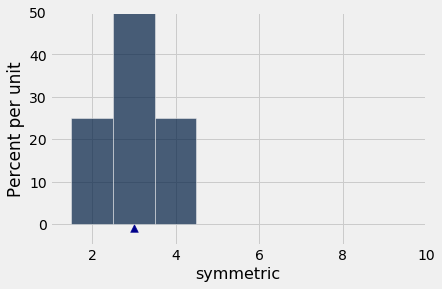

In [13]:
t2 = Table().with_columns('symmetric', symmetric)
mean_s = np.mean(symmetric)

t2.hist(bins=np.arange(1.5, 4.6, 1))
plots.scatter(mean_s, -0.009, marker='^', color='darkblue', s=60)
plots.xlim(1, 10)
plots.ylim(-0.05, 0.5);

In [14]:
np.mean(symmetric)

3.0

In [15]:
percentile(50, symmetric)

3

In general, **for symmetric distributions, the mean and the median are equal.**

What if the distribution is not symmetric? Let's compare `symmetric` and `not_symmetric`.

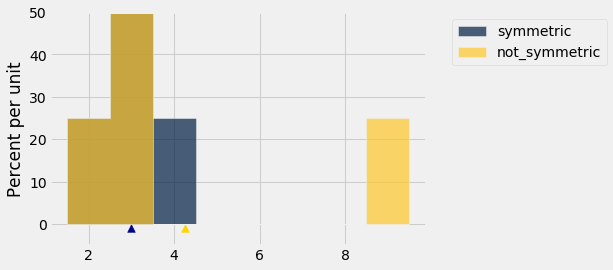

In [16]:
t3 = t2.with_column(
        'not_symmetric', not_symmetric
)

t3.hist(bins=np.arange(1.5, 9.6, 1))
plots.scatter(mean_s, -0.009, marker='^', color='darkblue', s=60)
plots.scatter(mean_ns, -0.009, marker='^', color='gold', s=60)
plots.ylim(-0.05, 0.5);

The blue histogram represents the original `symmetric` distribution. The gold histogram of `not_symmetric` starts out the same as the blue at the left end, but its rightmost bar has slid over to the value 9. The brown part is where the two histograms overlap.

The median and mean of the blue distribution are both equal to 3. The median of the gold distribution is also equal to 3, though the right half is distributed differently from the left. 

But the mean of the gold distribution is not 3: the gold histogram would not balance at 3. The balance point has shifted to the right, to 4.25.

In the gold distribution, 3 out of 4 entries (75%) are below average. The student with a below average score can therefore take heart. He or she might be in the majority of the class.

In general, **if the histogram has a tail on one side (the formal term is "skewed"), then the mean is pulled away from the median in the direction of the tail.**

### Example ###
The table `sf2015` contains salary and benefits data for San Francisco City employees in 2015. As before, we will restrict our analysis to those who had the equivalent of at least half-time employment for the year.

In [17]:
sf2015 = Table.read_table('https://gitlab.com/tae-public/data/raw/master/cs61/data8assets/textbook/chapters/san_francisco_2015.csv').where('Salaries', are.above(10000))

As we saw earlier, the highest compensation was above \$600,000 but the vast majority of employees had compensations below \$300,000.

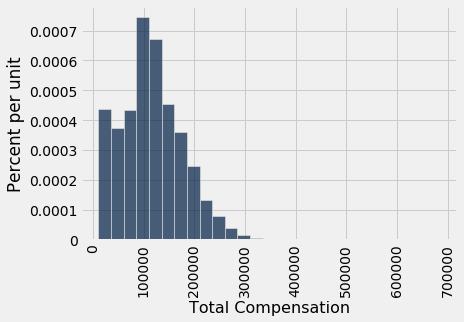

In [18]:
sf2015.select('Total Compensation').hist(bins = np.arange(10000, 700000, 25000))

This histogram is skewed to the right; it has a right-hand tail. 

The mean gets pulled away from the median in the direction of the tail. So we expect the mean compensation to be larger than the median, and that is indeed the case.

In [19]:
compensation = sf2015.column('Total Compensation')
percentile(50, compensation)

110305.79

In [20]:
np.mean(compensation)

114725.98411824222

Distributions of incomes of large populations tend to be right skewed. When the bulk of a population has middle to low incomes, but a very small proportion has very high incomes, the histogram has a long, thin tail to the right. 

The mean income is affected by this tail: the farther the tail stretches to the right, the larger the mean becomes. But the median is not affected by values at the extremes of the distribution. That is why economists often summarize income distributions by the median instead of the mean.

# Unit 2: Variability

### Variability ###
The mean tells us where a histogram balances. But in almost every histogram we have seen, the values spread out on both sides of the mean. How far from the mean can they be? To answer this question, we will develop a measure of variability about the mean.

We will start by describing how to calculate the measure. Then we will see why it is a good measure to calcualte.

### The Rough Size of Deviations from Average ###
For simplicity, we will begin our calcuations in the context of a simple array `any_numbers` consisting of just four values. As you will see, our method will extend easily to any other array of values.

In [21]:
any_numbers = make_array(1, 2, 2, 10)

The goal is to measure roughly how far off the numbers are from their average. To do this, we first need the average: 

In [22]:
# Step 1. The average.

mean = np.mean(any_numbers)
mean

3.75

Next, let's find out how far each value is from the mean. These are called the *deviations from the average*. A "deviation from average" is just a value minus the average. The table `calculation_steps` displays the results.

In [23]:
# Step 2. The deviations from average.

deviations = any_numbers - mean
calculation_steps = Table().with_columns(
        'Value', any_numbers,
        'Deviation from Average', deviations
        )
calculation_steps

Value,Deviation from Average
1,-2.75
2,-1.75
2,-1.75
10,6.25


Some of the deviations are negative; those correspond to values that are below average. Positive deviations correspond to above-average values.

To calculate roughly how big the deviations are, it is natural to compute the mean of the deviations. But something interesting happens when all the deviations are added together:

In [24]:
sum(deviations)

0.0

The positive deviations exactly cancel out the negative ones. This is true of all lists of numbers, no matter what the histogram of the list looks like: **the sum of the deviations from average is zero.** 

Since the sum of the deviations is 0, the mean of the deviations will be 0 as well:

In [25]:
np.mean(deviations)

0.0

Because of this, the mean of the deviations is not a useful measure of the size of the deviations. What we really want to know is roughly how big the deviations are, regardless of whether they are positive or negative. So we need a way to eliminate the signs of the deviations.

There are two time-honored ways of losing signs: the absolute value, and the square. It turns out that taking the square constructs a measure with extremely powerful properties, some of which we will study in this course.

So let's eliminate the signs by squaring all the deviations. Then we will take the mean of the squares:

In [26]:
# Step 3. The squared deviations from average

squared_deviations = deviations ** 2
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations
    )
calculation_steps

Value,Deviation from Average,Squared Deviations from Average
1,-2.75,7.5625
2,-1.75,3.0625
2,-1.75,3.0625
10,6.25,39.0625


In [27]:
# Step 4. Variance = the mean squared deviation from average

variance = np.mean(squared_deviations)
variance

13.1875

**Variance:** The mean squared deviation calculated above is called the *variance* of the values. 

While the variance does give us an idea of spread, it is not on the same scale as the original variable as its units are the square of the original. This makes interpretation very difficult. 

So we return to the original scale by taking the positive square root of the variance:

In [28]:
# Step 5.
# Standard Deviation:    root mean squared deviation from average
# Steps of calculation:   5    4      3       2             1

sd = variance ** 0.5
sd

3.6314597615834874

### Standard Deviation ###

The quantity that we have just computed is called the *standard deviation* of the list, and is abbreviated as SD. It measures roughly how far the numbers on the list are from their average.

**Definition.** The SD of a list is defined as the *root mean square of deviations from average*. That's a mouthful. But read it from right to left and you have the sequence of steps in the calculation.

**Computation.** The five steps described above result in the SD. You can also use the function ``np.std`` to compute the SD of values in an array:

In [29]:
np.std(any_numbers)

3.6314597615834874

### Working with the SD ###

To see what we can learn from the SD, let's move to a more interesting dataset than `any_numbers`. The table `nba13` contains data on the players in the National Basketball Association (NBA) in 2013. For each player, the table records the position at which the player usually played, his height in inches, his weight in pounds, and his age in years.

In [30]:
nba13 = Table.read_table('https://gitlab.com/tae-public/data/raw/master/cs61/data8assets/textbook/chapters/nba2013.csv')
nba13

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


Here is a histogram of the players' heights.

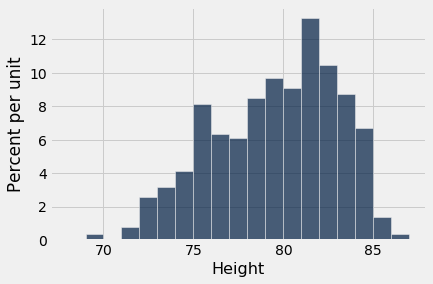

In [31]:
nba13.select('Height').hist(bins=np.arange(68, 88, 1))

It is no surprise that NBA players are tall! Their average height is just over 79 inches (6'7"), about 10 inches taller than the average height of men in the United States.

In [32]:
mean_height = np.mean(nba13.column('Height'))
mean_height

79.06534653465347

About how far off are the players' heights from the average? This is measured by the SD of the heights, which is about 3.45 inches.

In [33]:
sd_height = np.std(nba13.column('Height'))
sd_height

3.4505971830275546

The towering center Hasheem Thabeet of the Oklahoma City Thunder was the tallest player at a height of 87 inches.

In [34]:
nba13.sort('Height', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26
Roy Hibbert,Center,86,278,26
Tyson Chandler,Center,85,235,30


Thabeet was about 8 inches above the average height.

In [35]:
87 - mean_height

7.934653465346528

That's a deviation from average, and it is about 2.3 times the standard deviation:

In [36]:
(87 - mean_height)/sd_height

2.2995015194397923

In other words, the height of the tallest player was about 2.3 SDs above average.

At 69 inches tall, Isaiah Thomas was one of the two shortest NBA players in 2013. His height was about 2.9 SDs below average.

In [37]:
nba13.sort('Height').show(3)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,Guard,69,185,24
Nate Robinson,Guard,69,180,29
John Lucas III,Guard,71,157,30


In [38]:
(69 - mean_height)/sd_height

-2.9169868288775844

What we have observed is that the tallest and shortest players were both just a few SDs away from the average height. This is an example of why the SD is a useful measure of spread. No matter what the shape of the histogram, the average and the SD together tell you a lot about where the histogram is situated on the number line.

### First main reason for measuring spread by the SD

**Informal statement.** In all numerical data sets, the bulk of the entries are within the range "average $\pm$ a few SDs".

For now, resist the desire to know exactly what fuzzy words like "bulk" and "few" mean. We wil make them precise later in this section. Let's just examine the statement in the context of some more examples.

We have already seen that *all* of the heights of the NBA players were in the range "average $\pm$ 3 SDs". 

What about the ages? Here is a histogram of the distribution, along with the mean and SD of the ages.

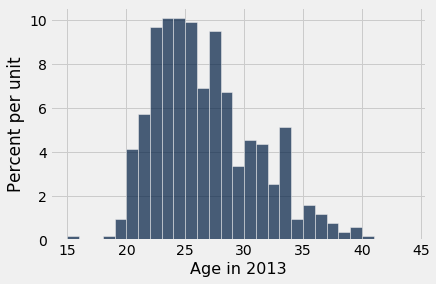

In [39]:
nba13.select('Age in 2013').hist(bins=np.arange(15, 45, 1))

In [40]:
ages = nba13.column('Age in 2013')
mean_age = np.mean(ages)
sd_age = np.std(ages)
mean_age, sd_age

(26.19009900990099, 4.321200441720307)

The average age was just over 26 years, and the SD was about 4.3 years.

How far off were the ages from the average? Just as we did with the heights, let's look at the two extreme values of the ages.

Juwan Howard was the oldest player, at 40. 

In [41]:
nba13.sort('Age in 2013', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Juwan Howard,Forward,81,250,40
Marcus Camby,Center,83,235,39
Derek Fisher,Guard,73,210,39


Howard's age was about 3.2 SDs above average.

In [42]:
(40 - mean_age)/sd_age

3.1958482778922357

The youngest was 15-year-old Jarvis Varnado, who won the NBA Championship that year with the Miami Heat. His age was about 2.6 SDs below average.

In [43]:
nba13.sort('Age in 2013').show(3)

Name,Position,Height,Weight,Age in 2013
Jarvis Varnado,Forward,81,230,15
Giannis Antetokounmpo,Forward,81,205,18
Sergey Karasev,Guard,79,197,19


In [44]:
(15 - mean_age)/sd_age

-2.589581103867081

What we have observed for the heights and ages is true in great generality. For *all* lists, the bulk of the entries are no more than 2 or 3 SDs away from the average. 

### Chebychev's Bounds ###
The Russian mathematician [Pafnuty Chebychev](https://en.wikipedia.org/wiki/Pafnuty_Chebyshev) (1821-1894) proved a result that makes our rough statements precise.

**For all lists, and all numbers $z$, the proportion of entries that are in the range
"average $\pm z$ SDs" is at least $1 - \frac{1}{z^2}$.**

It is important to note that the result gives a bound, not an exact value or an approximation.

What makes the result powerful is that it is true for all lists – all distributions, no matter how irregular. 

Specifically, it says that for every list:

- the proportion in the range "average $\pm$ 2 SDs" is **at least 1 - 1/4 = 0.75**

- the proportion in the range "average $\pm$ 3 SDs" is **at least 1 - 1/9 $\approx$ 0.89**

- the proportion in the range "average $\pm$ 4.5 SDs" is **at least 1 - 1/$\boldsymbol{4.5^2}$ $\approx$ 0.95**

As we noted above, Chebychev's result gives a lower bound, not an exact answer or an approximation. For example, the percent of entries in the range "average $\pm ~2$ SDs" might be quite a bit larger than 75%. But it cannot be smaller.

### Standard units

In the calculations above, the quantity $z$ measures *standard units*, the number of standard deviations above average.

Some values of standard units are negative, corresponding to original values that are below average. Other values of standard units are positive. But no matter what the distribution of the list looks like, Chebychev's bounds imply that standard units will typically be in the (-5, 5) range.

To convert a value to standard units, first find how far it is from average, and then compare that deviation with the standard deviation.
$$
z ~=~ \frac{\mbox{value }-\mbox{ average}}{\mbox{SD}}
$$

As we will see, standard units are frequently used in data analysis. So it is useful to define a function that converts an array of numbers to standard units.

In [45]:
def standard_units(numbers_array):
    "Convert any array of numbers to standard units."
    return (numbers_array - np.mean(numbers_array))/np.std(numbers_array)    

### Example ###
As we saw in an earlier section, the table `united` contains a column `Delay` consisting of the departure delay times, in minutes, of over thousands of United Airlines flights in the summer of 2015. We will create a new column called `Delay (Standard Units)` by applying the function `standard_units` to the column of delay times. This allows us to see all the delay times in minutes as well as their corresponding values in standard units. 

In [46]:
united = Table.read_table('https://gitlab.com/tae-public/data/raw/master/cs61/data8assets/textbook/chapters/united_summer2015.csv')
united = united.with_column(
    'Delay (Standard Units)', standard_units(united.column('Delay'))
)
united

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/1/15,73,HNL,257,6.08766
6/1/15,217,EWR,28,0.287279
6/1/15,237,STL,-3,-0.497924
6/1/15,250,SAN,0,-0.421937
6/1/15,267,PHL,64,1.19913
6/1/15,273,SEA,-6,-0.573912
6/1/15,278,SEA,-8,-0.62457
6/1/15,292,EWR,12,-0.117987
6/1/15,300,HNL,20,0.0846461
6/1/15,317,IND,-10,-0.675228


The standard units that we can see are consistent with what we expect based on Chebychev's bounds. Most are of quite small size; only one is above 6.

But something rather alarming happens when we sort the delay times from highest to lowest. The standard units that we can see are extremely high!

In [47]:
united.sort('Delay', descending=True)

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/21/15,1964,SEA,580,14.269
6/22/15,300,HNL,537,13.1798
6/21/15,1149,IAD,508,12.4453
6/20/15,353,ORD,505,12.3693
8/23/15,1589,ORD,458,11.1788
7/23/15,1960,LAX,438,10.6722
6/23/15,1606,ORD,430,10.4696
6/4/15,1743,LAX,408,9.91236
6/17/15,1122,HNL,405,9.83637
7/27/15,572,ORD,385,9.32979


What this shows is that it is possible for data to be many SDs above average (and for flights to be delayed by almost 10 hours). The highest value of delay is more than 14 in standard units. 

However, the proportion of these extreme values is small, and Chebychev's bounds still hold true. For example, let us calculate the percent of delay times that are in the range "average $\pm$ 3 SDs". This is the same as the percent of times for which the standard units are in the range (-3, 3). That is about 98%, as computed below, consistent with Chebychev's bound of "at least 89%". 

In [48]:
within_3_sd = united.where('Delay (Standard Units)', are.between(-3, 3))
within_3_sd.num_rows/united.num_rows

0.9790235081374322

The histogram of delay times is shown below, with the horizontal axis in standard units. By the table above, the right hand tail continues all the way out to $z=14.27$ standard units (580 minutes). The area of the histogram outside the range $z=-3$ to $z=3$ is about 2%, put together in tiny little bits that are mostly invisible in the histogram.

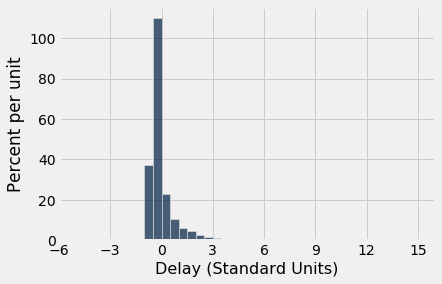

In [49]:
united.hist('Delay (Standard Units)', bins=np.arange(-5, 15.5, 0.5))
plots.xticks(np.arange(-6, 17, 3));

# Unit 3: The SD and the Normal Curve

### The SD and the Normal Curve ###

We know that the mean is the balance point of the histogram. Unlike the mean, the SD is usually not easy to identify by looking at the histogram. 

However, there is one shape of distribution for which the SD is almost as clearly identifiable as the mean. That is the bell-shaped disribution. This section examines that shape, as it appears frequently in probability histograms and also in some histograms of data.  

### A Roughly Bell-Shaped Histogram of Data ###
Let us look at the distribution of heights of mothers in our familiar sample of 1,174 mother-newborn pairs. The mothers' heights have a mean of 64 inches and an SD of 2.5 inches. Unlike the heights of the basketball players, the mothers' heights are distributed fairly symmetrically about the mean in a bell-shaped curve.

In [50]:
baby = Table.read_table('https://gitlab.com/tae-public/data/raw/master/cs61/data8assets/textbook/chapters/baby.csv')

In [51]:
heights = baby.column('Maternal Height')
mean_height = np.round(np.mean(heights), 1)
mean_height

64.0

In [52]:
sd_height = np.round(np.std(heights), 1)
sd_height

2.5

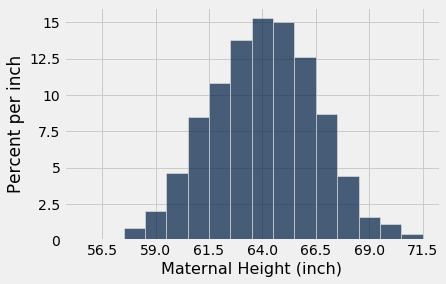

In [53]:
baby.hist('Maternal Height', bins=np.arange(55.5, 72.5, 1), unit='inch')
positions = np.arange(-3, 3.1, 1)*sd_height + mean_height
plots.xticks(positions);

The last two lines of code in the cell above change the labeling of the horizontal axis. Now, the labels correspond to "average $\pm$ $z$ SDs" for $z = 0, \pm 1, \pm 2$, and $\pm 3$. Because of the shape of the distribution, the "center" has an unambiguous meaning and is clearly visible at 64.

### How to Spot the SD on a Bell Shaped Curve ###

To see how the SD is related to the curve, start at the top of the curve and look towards the right. Notice that there is a place where the curve changes from looking like an "upside-down cup" to a "right-way-up cup"; formally, the curve has a point of inflection. That point is one SD above average. It is the point $z=1$, which is "average plus 1 SD" = 66.5 inches.

Symmetrically on the left-hand side of the mean, the point of inflection is at $z=-1$, that is, "average minus 1 SD" = 61.5 inches. 

In general, **for bell-shaped distributions, the SD is the distance between the mean and the points of inflection on either side.**

### The standard normal curve ###

All the bell-shaped histograms that we have seen look essentially the same apart from the labels on the axes. Indeed, there is really just one basic curve from which all of these curves can be drawn just by relabeling the axes appropriately. 

To draw that basic curve, we will use the units into which we can convert every list: standard units. The resulting curve is therefore called the *standard normal curve*. 

The standard normal curve has an impressive equation. But for now, it is best to think of it as a smoothed outline of a histogram of a variable that has been measured in standard units and has a bell-shaped distribution.

$$
\phi(z) = {\frac{1}{\sqrt{2 \pi}}} e^{-\frac{1}{2}z^2}, ~~ -\infty < z < \infty
$$

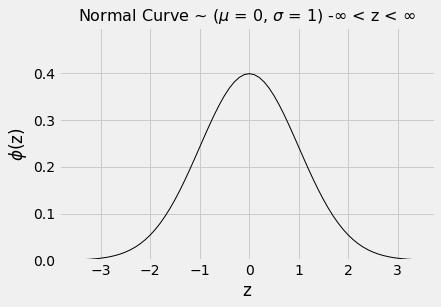

In [54]:
# The standard normal curve

plot_normal_cdf()

As always when you examine a new histogram, start by looking at the horizontal axis. On the horizontal axis of the standard normal curve, the values are standard units. 

Here are some properties of the curve. Some are apparent by observation, and others require a considerable amount of mathematics to establish.

- The total area under the curve is 1. So you can think of it as a histogram drawn to the density scale.

- The curve is symmetric about 0. So if a variable has this distribution, its mean and median are both 0.

- The points of inflection of the curve are at -1 and +1. 

- If a variable has this distribution, its SD is 1. The normal curve is one of the very few distributions that has an SD so clearly identifiable on the histogram.

Since we are thinking of the curve as a smoothed histogram, we will want to represent proportions of the total amount of data by areas under the curve. 

Areas under smooth curves are often found by calculus, using a method called integration. It is a fact of mathematics, however, that the standard normal curve cannot be integrated in any of the usual ways of calculus. 

Therefore, areas under the curve have to be approximated. That is why almost all statistics textbooks carry tables of areas under the normal curve. It is also why all statistical systems, including a module of Python, include methods that provide excellent approximations to those areas.

In [55]:
from scipy import stats

### The standard normal "cdf" ###

The fundamental function for finding areas under the normal curve is `stats.norm.cdf`. It takes a numerical argument and returns all the area under the curve to the left of that number. Formally, it is called the "cumulative distribution function" of the standard normal curve. That rather unwieldy mouthful is abbreviated as cdf.

Let us use this function to find the area to the left of $z=1$ under the standard normal curve. 

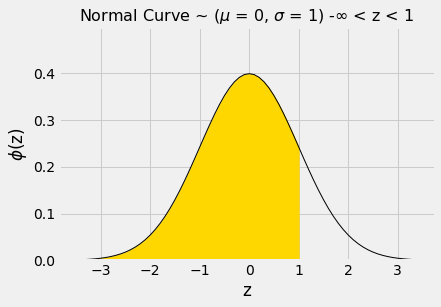

In [56]:
# Area under the standard normal curve, below 1

plot_normal_cdf(1)

The numerical value of the shaded area can be found by calling `stats.norm.cdf`.

In [57]:
stats.norm.cdf(1)

0.8413447460685429

That's about 84%. We can now use the symmetry of the curve and the fact that the total area under the curve is 1 to find other areas. 

The area to the right of $z=1$ is about 100% - 84% = 16%.

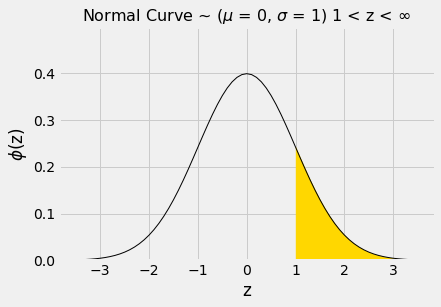

In [58]:
# Area under the standard normal curve, above 1

plot_normal_cdf(lbound=1)

In [59]:
1 - stats.norm.cdf(1)

0.15865525393145707

The area between $z=-1$ and $z=1$ can be computed in several different ways.  It is the gold area under the curve below. 

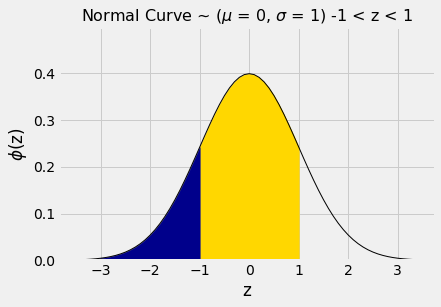

In [60]:
# Area under the standard normal curve, between -1 and 1

plot_normal_cdf(1, lbound=-1)

For example, we could calculate the area as "100% - two equal tails", which works out to roughly 100% - 2x16% = 68%.

Or we could note that the area between $z=1$ and $z=-1$ is equal to all the area to the left of $z=1$, minus all the area to the left of $z=-1$.

In [61]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

By a similar calculation, we see that the area between $-2$ and 2 is about 95%.

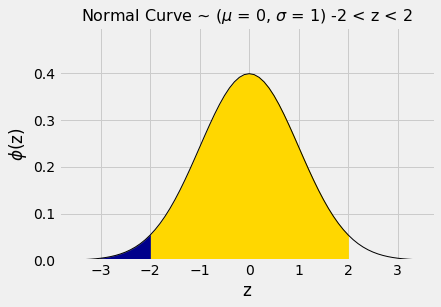

In [62]:
# Area under the standard normal curve, between -2 and 2

plot_normal_cdf(2, lbound=-2)

In [63]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

In other words, if a histogram is roughly bell shaped, the proportion of data in the range "average $\pm$ 2 SDs" is about 95%. 

That is quite a bit more than Chebychev's lower bound of 75%. Chebychev's bound is weaker because it has to work for all distributions. If we know that a distribution is normal, we have good approximations to the proportions, not just bounds.

The table below compares what we know about all distributions and about normal distributions. Notice that when $z=1$, Chebychev's bound is correct but not illuminating.

| Percent in Range   | All Distributions: Bound   | Normal Distribution: Approximation |
| :---------------   | :---------------- --| :-------------------|
|average $\pm$ 1 SD  | at least 0%         | about 68%           |
|average $\pm$ 2 SDs | at least 75%        | about 95%           |
|average $\pm$ 3 SDs | at least 88.888...% | about 99.73%        |